In [1]:
import os

import cartopy.crs as ccrs
import cmocean
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

# Local Utils
sys.path.insert(0, "/glade/work/zespinosa/Projects/climate-utils")
from utils import (
    plot_stationary_sp,
    xarray_monthly_to_time,
    xarray_time_to_monthly,
    detrend_data,
    get_season_anchored
)

ERROR 1: PROJ: proj_create_from_database: Open of /glade/work/zespinosa/conda-envs/cenv/share/proj failed


In [2]:
def spatial_era5_plots(df, title, sp):
    fig, ax = plot_stationary_sp()

    # Plot siconc filled contours
    img = ax.pcolormesh(
        df.lon,
        df.lat,
        df,
        vmin=-10,
        vmax=10,
        transform=ccrs.PlateCarree(), 
        cmap="RdBu",
    )
    cbar2 = fig.colorbar(img, ax=ax, orientation="horizontal")
    ax.set_title(title)
    fig.set_size_inches(8, 8)

In [10]:
ROOT = "/glade/scratch/zespinosa/archive/cesm2.2.0_BHIST_f09_g17_ERA5_nudge/atm/hist/"
fn = "cesm2.2.0_BHIST_f09_g17_ERA5_nudge.cam.h0.*"
from glob import glob
a = xr.open_mfdataset(glob(os.path.join(ROOT, fn)))
a["time"] = np.arange("1979-02", "1985-02", dtype="datetime64[M]")

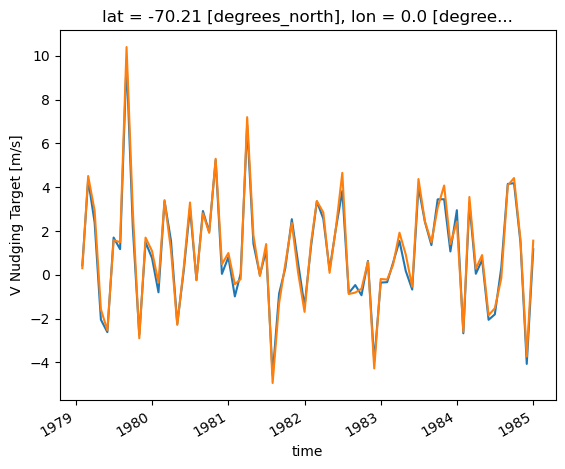

In [30]:
c = a.V.sel(lev=500, lat=-70, lon=0, method="nearest").plot()
b = a["Target_V"].sel(lev=500, lat=-70, lon=0, method="nearest").plot()

In [29]:
a

<xarray.Dataset>
Dimensions:           (lat: 192, lon: 288, time: 72, lev: 32, ilev: 33, nbnd: 2)
Coordinates:
  * lat               (lat) float64 -90.0 -89.06 -88.12 ... 88.12 89.06 90.0
  * lon               (lon) float64 0.0 1.25 2.5 3.75 ... 356.2 357.5 358.8
  * lev               (lev) float64 3.643 7.595 14.36 ... 957.5 976.3 992.6
  * ilev              (ilev) float64 2.255 5.032 10.16 ... 967.5 985.1 1e+03
  * time              (time) datetime64[ns] 1979-02-01 1979-03-01 ... 1985-01-01
Dimensions without coordinates: nbnd
Data variables: (12/380)
    gw                (time, lat) float64 dask.array<chunksize=(1, 192), meta=np.ndarray>
    hyam              (time, lev) float64 dask.array<chunksize=(1, 32), meta=np.ndarray>
    hybm              (time, lev) float64 dask.array<chunksize=(1, 32), meta=np.ndarray>
    P0                (time) float64 1e+05 1e+05 1e+05 ... 1e+05 1e+05 1e+05
    hyai              (time, ilev) float64 dask.array<chunksize=(1, 33), meta=np.ndarray>
    hybi              (time, ilev) float64 dask.array<chunksize=(1, 33), meta=np.ndarray>
    ...                ...
    soa_a2SFWET       (time, lat, lon) float32 dask.array<chunksize=(1, 192, 288), meta=np.ndarray>
    soa_a2_SRF        (time, lat, lon) float32 dask.array<chunksize=(1, 192, 288), meta=np.ndarray>
    soa_c1            (time, lev, lat, lon) float32 dask.array<chunksize=(1, 32, 192, 288), meta=np.ndarray>
    soa_c1SFWET       (time, lat, lon) float32 dask.array<chunksize=(1, 192, 288), meta=np.ndarray>
    soa_c2            (time, lev, lat, lon) float32 dask.array<chunksize=(1, 32, 192, 288), meta=np.ndarray>
    soa_c2SFWET       (time, lat, lon) float32 dask.array<chunksize=(1, 192, 288), meta=np.ndarray>
Attributes:
    Conventions:       CF-1.0
    source:            CAM
    case:              cesm2.2.0_BHIST_f09_g17_ERA5_nudge
    logname:           zespinosa
    host:              cheyenne3
    initial_file:      b.e21.BHIST.f09_g17.CMIP6-historical.001.cam.i.1980-01...
    topography_file:   /glade/p/cesmdata/cseg/inputdata/atm/cam/topo/fv_0.9x1...
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    time_period_freq:  month_1

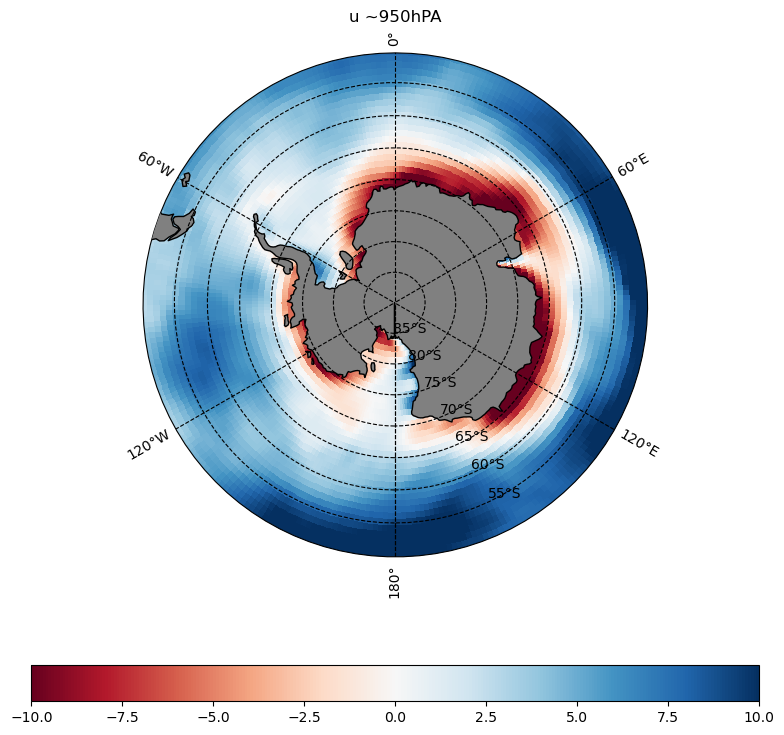

In [22]:
d = a.U.sel(lev=992, method="nearest").sel(time=np.arange("1984-06", "1984-07", dtype="datetime64[M]")).mean("time")
spatial_era5_plots(d, "u ~950hPA", None)

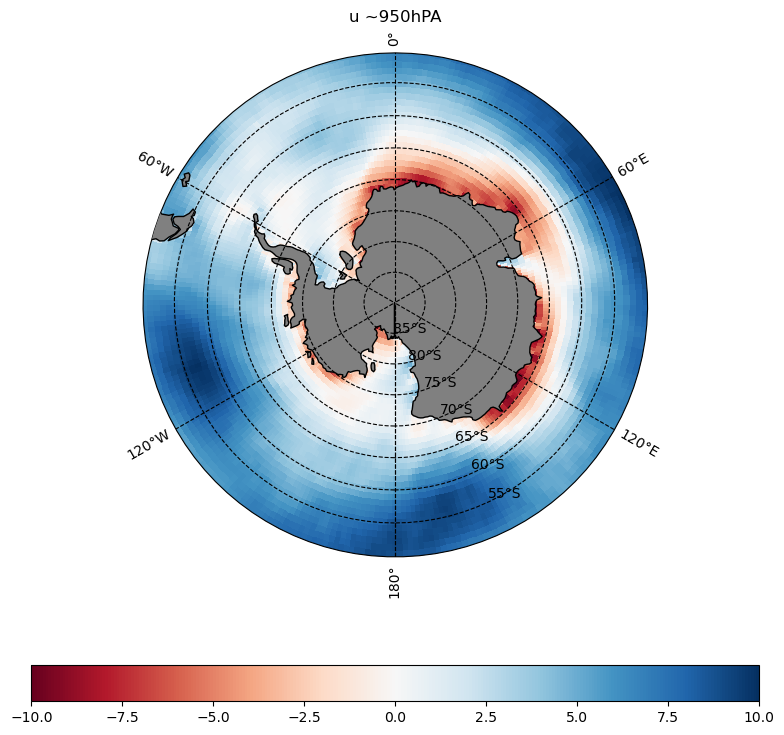

In [23]:
d = a["Target_U"].sel(lev=992, method="nearest").sel(time=np.arange("1984-06", "1984-07", dtype="datetime64[M]")).mean("time")
spatial_era5_plots(d, "u ~950hPA", None)

In [25]:
df = xr.open_dataset(os.path.join("/glade/scratch/zespinosa/archive/BHIST_f09_g17_ERA5_nudge/atm/hist/", "BHIST_f09_g17_ERA5_nudge.cam.h0.1980-01.nc"))
v = df["V"].sel(lev=df.lev[-3], lat=slice(-90, -50)).squeeze()
target_v = df["Target_V"].sel(lev=df.lev[-3], lat=slice(-90, -50)).squeeze()

u = df["U"].sel(lev=df.lev[-3], lat=slice(-90, -50)).squeeze()
target_u = df["Target_U"].sel(lev=df.lev[-3], lat=slice(-90, -50)).squeeze()

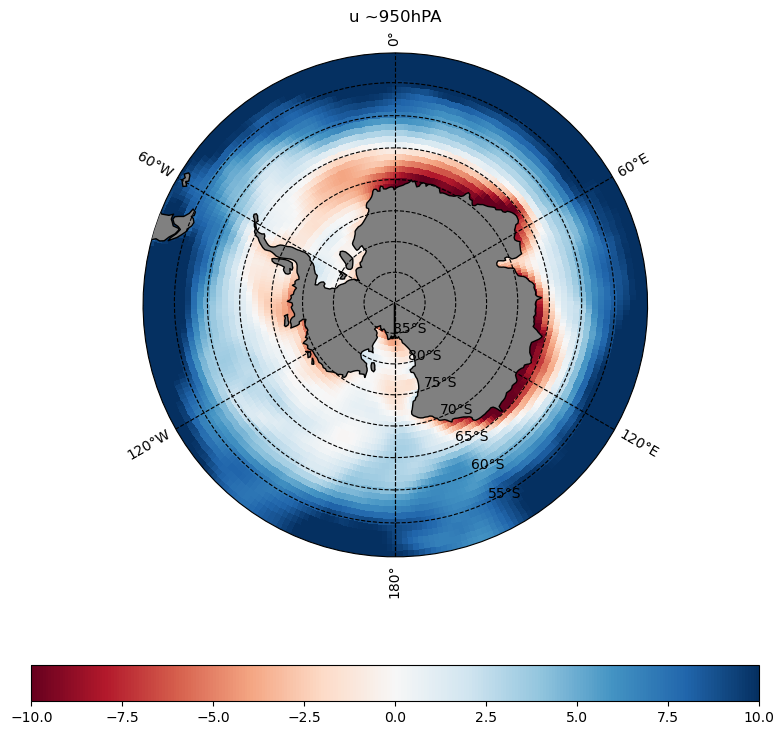

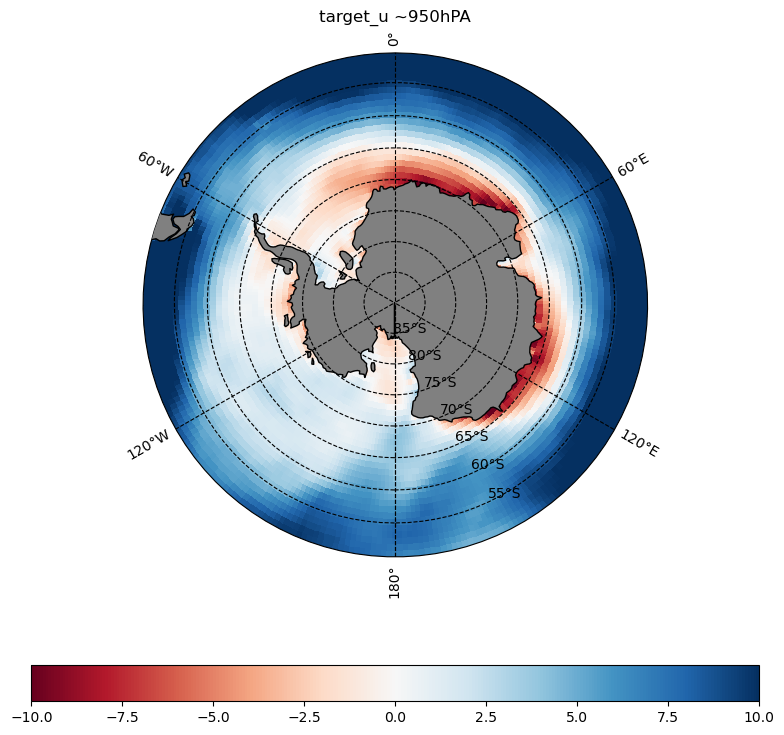

In [26]:
spatial_era5_plots(u, "u ~950hPA", None)
spatial_era5_plots(target_u, "target_u ~950hPA", None)

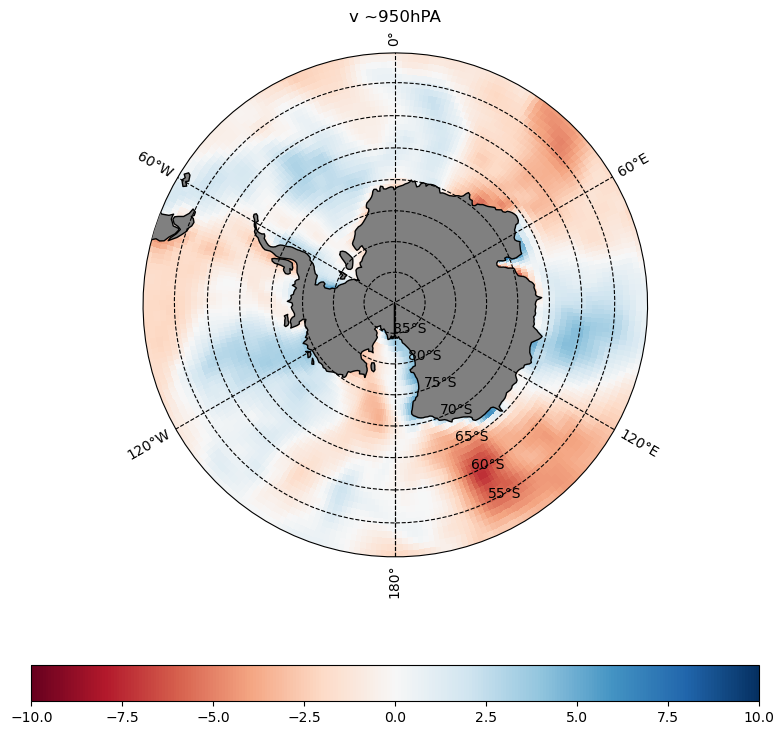

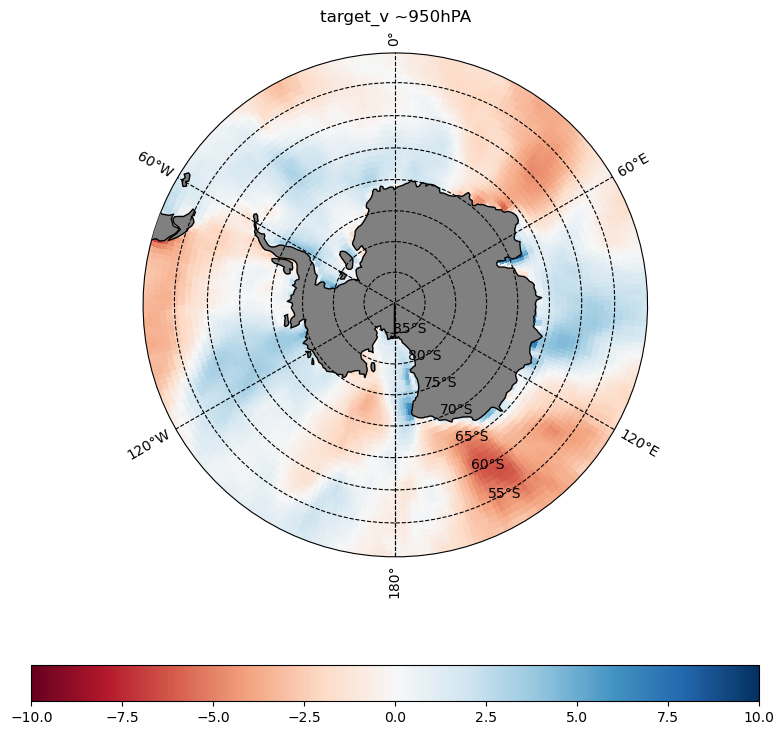

In [27]:
spatial_era5_plots(v, "v ~950hPA", None)
spatial_era5_plots(target_v, "target_v ~950hPA", None)

# Sanity Check ERA5 Data

<xarray.DataArray 'u' (lat: 721, lon: 1440)>
[1038240 values with dtype=float32]
Coordinates:
  * lon      (lon) float32 0.0 0.25 0.5 0.75 1.0 ... 359.0 359.2 359.5 359.8
  * lat      (lat) float32 90.0 89.75 89.5 89.25 ... -89.25 -89.5 -89.75 -90.0
    level    int32 850
    time     datetime64[ns] 2022-12-01
Attributes:
    units:          m s**-1
    long_name:      U component of wind
    standard_name:  eastward_wind
<xarray.DataArray 'U' (lat: 192, lon: 288)>
array([[ 8.313215e-04,  8.313215e-04,  8.313215e-04, ...,  8.313215e-04,
         8.313215e-04,  8.313215e-04],
       [-4.965023e+00, -4.851955e+00, -4.732774e+00, ..., -5.258391e+00,
        -5.169769e+00, -5.071980e+00],
       [-5.282838e+00, -5.310341e+00, -5.325621e+00, ..., -5.350068e+00,
        -5.288950e+00, -5.267558e+00],
       ...,
       [ 3.955180e+00,  4.217988e+00,  4.483852e+00, ...,  3.163699e+00,
         3.432619e+00,  3.695427e+00],
       [ 4.052969e+00,  4.101863e+00,  4.150758e+00, ...,  3.869614e+0

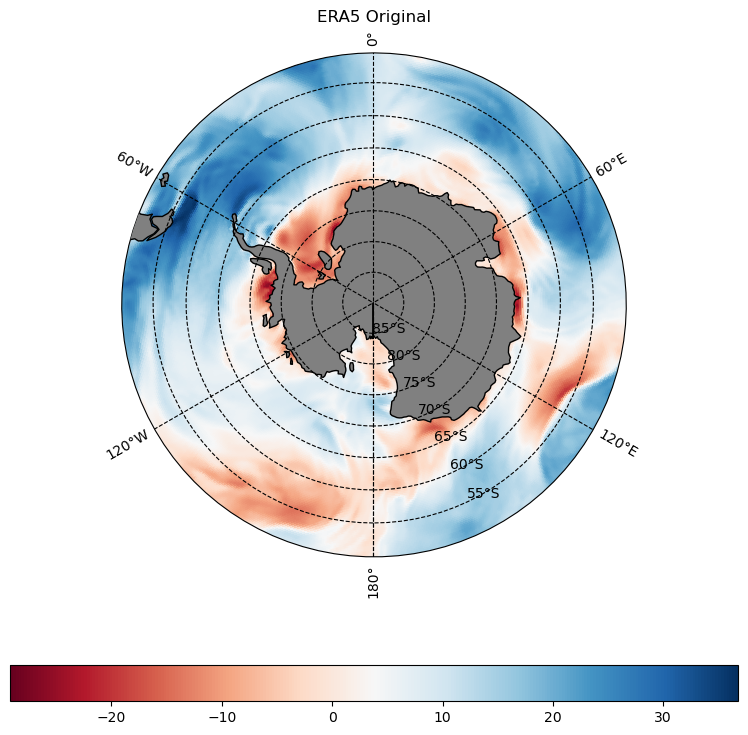

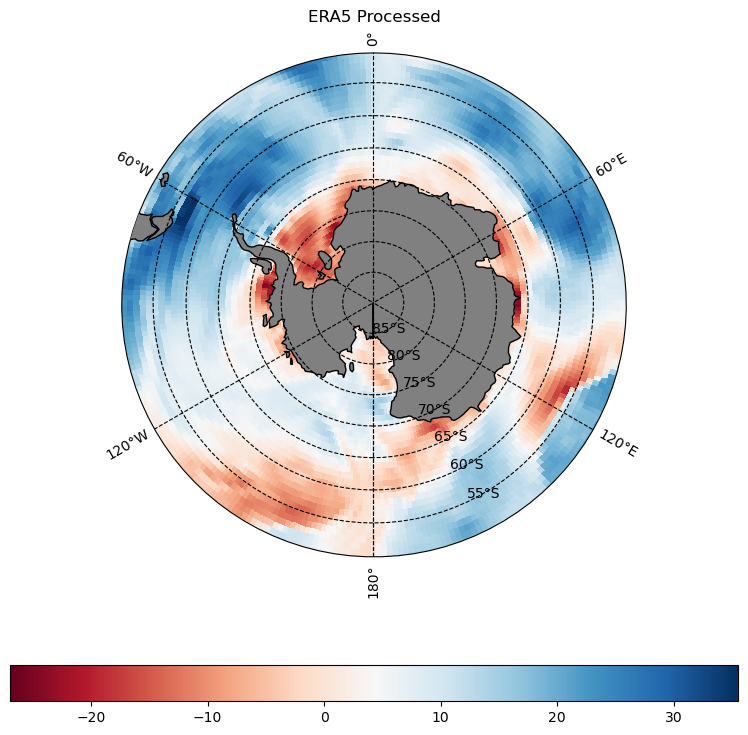

In [33]:
root = "/glade/scratch/zespinosa/targetdata/nudging"

fn = "ERA5original/202212/e5.oper.an.pl.128_131_u.ll025uv.2022120100_2022120123.nc"
df_org = xr.open_dataset(os.path.join(root, fn))
df_org = df_org.rename({"latitude": "lat", "longitude": "lon"})

fn = "ERA5/ERA5.6hour.30level.uvtq.2022-12-01-00000.nc"
df_new = xr.open_dataset(os.path.join(root, fn))

u_org = df_org.sel(level=850, time="2022-12-01T00:00:00").u
u_new = df_new.sel(lev=859).squeeze().U
print(u_org)
print(u_new)

spatial_era5_plots(u_org, "ERA5 Original", None)
spatial_era5_plots(u_new, "ERA5 Processed", None)


# CESM2 Nudging 

In [4]:
root = "/glade/scratch/zespinosa/archive/BHIST_f09_g17_ERA5_nudge/atm/hist/"
fn = "BHIST_f09_g17_ERA5_nudge.cam.h0.1979-01.nc"

root = "/glade/scratch/zespinosa/archive/cesm2.2.0_BHIST_f09_g17_ERA5_nudge/atm/hist"
fn = "cesm2.2.0_BHIST_f09_g17_ERA5_nudge.cam.h0.1980-01.nc"
df = xr.open_dataset(os.path.join(root, fn))
print(df.lev)
print(df)
u = df.U.sel(lev=df.lev[-10]).squeeze()
target_u = df.Target_U.sel(lev=df.lev[-10]).squeeze()
print(target_u)

<xarray.DataArray 'lev' (lev: 32)>
array([  3.643466,   7.59482 ,  14.356632,  24.61222 ,  35.92325 ,  43.19375 ,
        51.677499,  61.520498,  73.750958,  87.82123 , 103.317127, 121.547241,
       142.994039, 168.22508 , 197.908087, 232.828619, 273.910817, 322.241902,
       379.100904, 445.992574, 524.687175, 609.778695, 691.38943 , 763.404481,
       820.858369, 859.534767, 887.020249, 912.644547, 936.198398, 957.48548 ,
       976.325407, 992.556095])
Coordinates:
  * lev      (lev) float64 3.643 7.595 14.36 24.61 ... 936.2 957.5 976.3 992.6
Attributes:
    long_name:      hybrid level at midpoints (1000*(A+B))
    units:          hPa
    positive:       down
    standard_name:  atmosphere_hybrid_sigma_pressure_coordinate
    formula_terms:  a: hyam b: hybm p0: P0 ps: PS
<xarray.Dataset>
Dimensions:           (lat: 192, lon: 288, lev: 32, ilev: 33, time: 1, nbnd: 2)
Coordinates:
  * lat               (lat) float64 -90.0 -89.06 -88.12 ... 88.12 89.06 90.0
  * lon               (lo

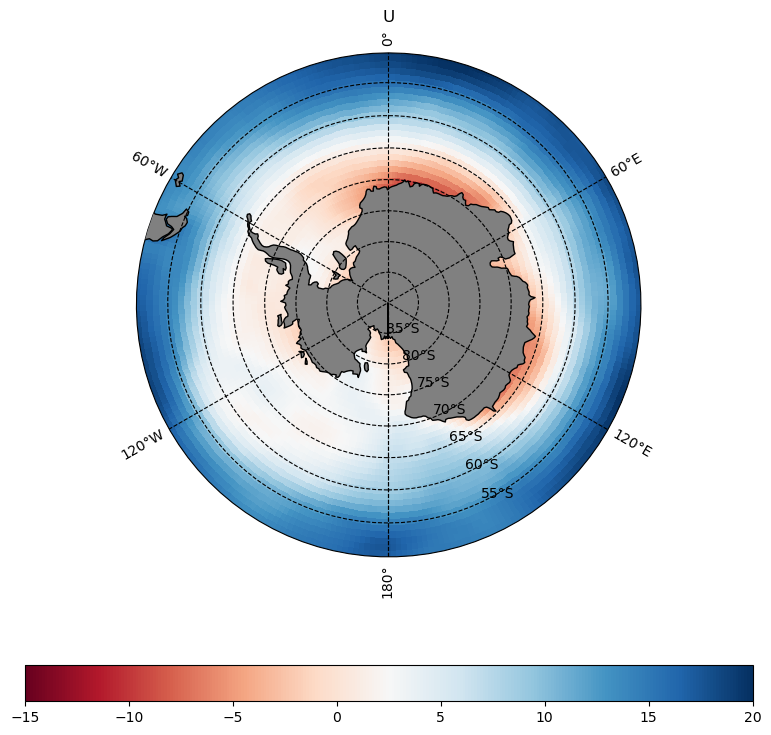

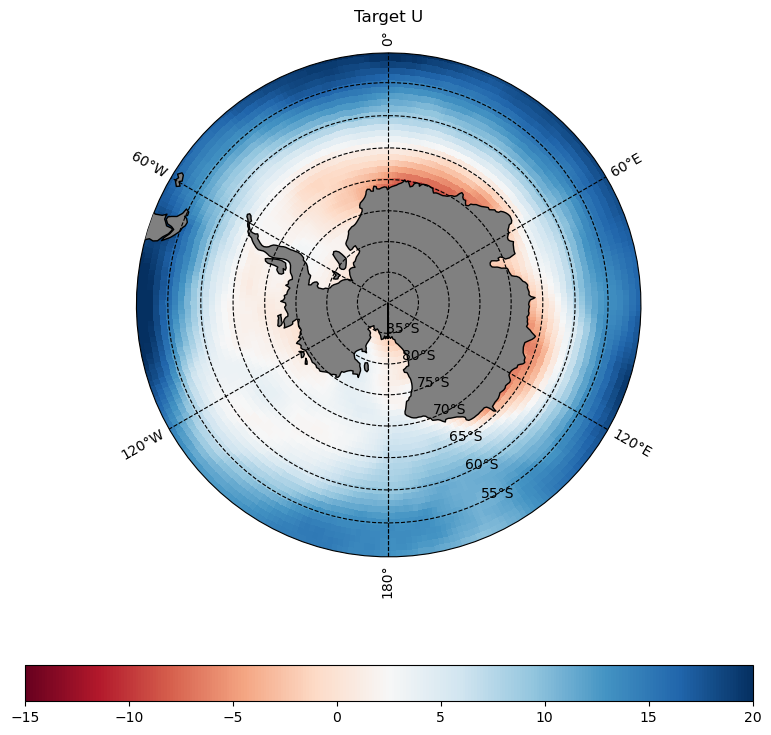

In [7]:
def spatial_cesm_plots(df, title, sp):
    fig, ax = plot_stationary_sp()
    df = df[:367,:]

    # Plot siconc filled contours
    img = ax.pcolormesh(
        df.lon,
        df.lat,
        df,
        vmax=20,
        vmin=-15, 
        transform=ccrs.PlateCarree(), 
        cmap="RdBu",
    )
    cbar2 = fig.colorbar(img, ax=ax, orientation="horizontal")
    ax.set_title(title)
    fig.set_size_inches(8, 8)

spatial_cesm_plots(u, "U", None)
spatial_cesm_plots(target_u, "Target U", None)